# **Essentials Libraries**

**Importing necessary libraries**
*  **pandas:** Manipulate and analyze data tables.
*  **re (regular expressions):** Search and manipulate strings using patterns.
*  **unicodedata:** Normalize and process Unicode text.
*  **transformers (AutoTokenizer):** Tokenize text using pre-trained NLP models.
*  **imblearn.over_sampling (SMOTE):** Balance dataset by creating synthetic samples of the minority class.
*  **imblearn.under_sampling (RandomUnderSampler):** Reduce majority class to balance dataset.
*  **sklearn.model_selection (train_test_split):** Split dataset into training and testing sets.
*  **sklearn.feature_extraction.text (TfidfVectorizer):** Convert text to numerical features using TF-IDF.
*  **sklearn.linear_model (LogisticRegression):** Train a classification model using logistic regression.
*  **sklearn.metrics:** Evaluate model performance (accuracy, precision, recall, F1, confusion matrix, report).
*  **random:** Perform random operations like shuffling and sampling.
*  **matplotlib.pyplot:** Create visualizations and plots.
*  **seaborn:** Enhanced statistical data visualization based on matplotlib.
*  **joblib:** Save and load Python objects efficiently


In [1]:
import pandas as pd
import re
import unicodedata
from transformers import AutoTokenizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import random
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump

# **Mount from Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load the Dataset**

In [3]:
# Load the dataset
file_path = '/content/drive/MyDrive/Technohaven/Bangla-Text-Dataset-main/dataset.csv'
df = pd.read_csv(file_path)

# Display the dataset
print("First few rows of the dataset:")
df.head(10)

First few rows of the dataset:


,comment,Category,Gender,comment react number,label
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,Actor,Female,1.0,sexual
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,Singer,Male,2.0,not bully
2,"অরে বাবা, এই টা কোন পাগল????",Actor,Female,2.0,not bully
3,ক্যাপ্টেন অফ বাংলাদেশ,Sports,Male,0.0,not bully
4,পটকা মাছ,Politician,Male,0.0,troll
5,অন্যরকম .. ভালো লাগলো ..❤️,Singer,Male,1.0,not bully
6,সাংবাদিক ভাইদের বলছি এই সংবাদ গুলি প্রচার না ক...,Actor,Female,9.0,troll
7,মোহাম্মদ কফিল উদ্দীন মাহমুদRidwan RomelDwaipay...,Actor,Female,0.0,not bully
8,ঢাকায় এত ঘনো ঘনো আগুন লাগার মূল কারন টা এতদিনে...,Actor,Female,4.0,religious
9,"হিরো আলম তুমি এগিয়ে চলো, আমরা আছি তোমার সাথে।",Social,Male,0.0,not bully


# **Data Analysis**

**Print the shape of the dataset**

In [4]:
df.shape

(44001, 5)

**Calculate the percentage of Male and Female members and plot**

In [5]:
# Calculate the total number of entries
total_entries = len(df)

# Count the number of males and females
gender_counts = df['Gender'].value_counts()

# Calculate the percentage of each class
gender_percentages = (gender_counts / total_entries) * 100

# Print the results
for gender, percentage in gender_percentages.items():
    print(f"Percentage of gender '{gender}': {percentage:.2f}%")

print()

Percentage of gender 'Female': 68.07%
Percentage of gender 'Male': 31.93%



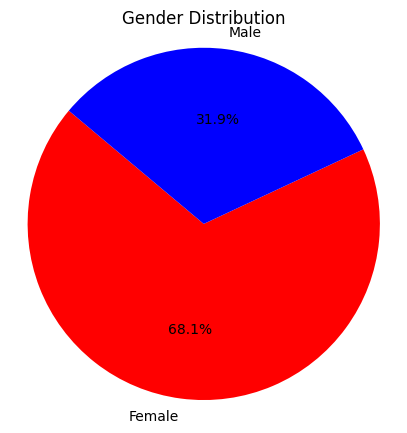

In [6]:
# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_percentages, labels=gender_percentages.index, autopct='%1.1f%%', startangle=140, colors=['#ff0000','#0000ff'])
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Dataset Review:**
The dataset consists of social media comments written in Bangla, which serve as the input texts. Each comment represents an individual piece of text expressing opinions, reactions, or statements related to celebrities, politicians, athletes, or social issues.


**Comment:** The comment column holds the actual text from social media that will be analyzed or classified.

**Label:** The label column shows the category of each comment. such as:
*   sexual
*   not bully
*   troll
*   religious
*   threat

**label structure:**
The dataset uses a multiclass label structure because the comments are categorized into different types of bullying or sentiments. This means that each comment is labeled with one specific category, such as offensive language, hate speech, neutral, positive, or negative.

**Calculate the percentage of each classes and plot**

In [7]:
# Get distinct classes in the label
distinct_classes = df['label'].nunique()

# Print result
print(f"Number of classes: {distinct_classes}")

# Count of each distinct class
class_counts = df['label'].value_counts()

# Calculate the percentage of each class
class_percentages = (class_counts / total_entries) * 100

# Print results
for label, percentage in class_percentages.items():
    print(f"Percentage of class '{label}': {percentage:.2f}%")

print()

Number of classes: 5
Percentage of class 'not bully': 34.86%
Percentage of class 'troll': 23.78%
Percentage of class 'sexual': 20.29%
Percentage of class 'religious': 17.22%
Percentage of class 'threat': 3.85%



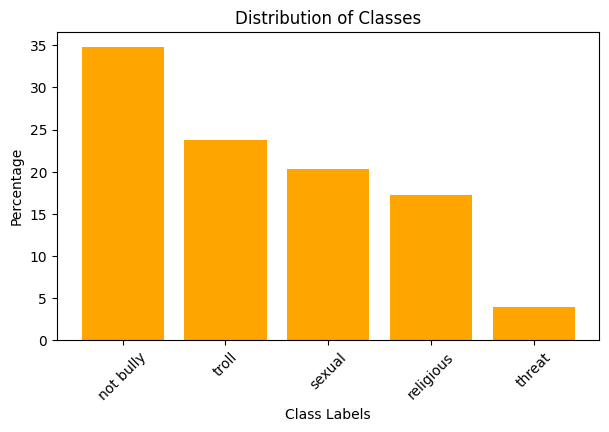

In [8]:
# Plot the histogram
plt.figure(figsize=(7,4))
plt.bar(class_percentages.index, class_percentages, color='orange')
plt.xlabel('Class Labels')
plt.ylabel('Percentage')
plt.title('Distribution of Classes')
plt.xticks(rotation=45)
plt.show()

# **Data Preprocessing**

**Normalization**

**Remove: Digits, Punctuations, Web Links, Non-Bengali Letters and Emoji's**

In [9]:
def normalize_bangla_text(text):
    text = str(text)

    # Remove Links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove digits
    text = re.sub(r'\d+', '', text)

    # Remove punctuation and symbols
    text = re.sub(r'[^\u0980-\u09FF\s]', '', text)

    # Remove Non-Bengali letters
    text = re.sub(r'[a-zA-Z]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [10]:
df['comment_normalized'] = df['comment'].apply(normalize_bangla_text)

**Test Normalized Data**

In [11]:
for i, row in df[['comment', 'comment_normalized']].head(10).iterrows():
    print(f"Original: {row['comment']}")
    print(f"Normalized: {row['comment_normalized']}")
    print("-" * 50)

Original: ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা মদ খাই দিনের বেলাও মাঝেমধ্যে খায় এখন ম*** চ**** সময় safa কে একটু চুদাম যার ইচ্ছা আছে চুদার লাইনে দারা একজন একজন করে জাবি
Normalized: ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা মদ খাই দিনের বেলাও মাঝেমধ্যে খায় এখন ম চ সময় কে একটু চুদাম যার ইচ্ছা আছে চুদার লাইনে দারা একজন একজন করে জাবি
--------------------------------------------------
Original: ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছিলেন?
Normalized: ঘরে বসে শুট করতে কেমন লেগেছে ক্যামেরাতে কে ছিলেন
--------------------------------------------------
Original: অরে বাবা, এই টা কোন পাগল????
Normalized: অরে বাবা এই টা কোন পাগল
--------------------------------------------------
Original: ক্যাপ্টেন অফ বাংলাদেশ
Normalized: ক্যাপ্টেন অফ বাংলাদেশ
--------------------------------------------------
Original: পটকা মাছ
Normalized: পটকা মাছ
--------------------------------------------------
Original: অন্যরকম .. ভালো লাগলো ..❤️
Normalized: অন্যরকম ভালো লাগলো
------------------------

**Remove Stopwords**

Here, I have used a Bangla Stopword Dataset for better Preprocessing. I have attatched the dataset in the data folder of my project.

In [12]:
# Load Bangla stopwords
stopwords_df = pd.read_excel('/content/drive/MyDrive/Technohaven/Bangla-Text-Dataset-main/Stopwords.xlsx')
stopwords_list = stopwords_df.iloc[:, 0].astype(str).tolist()

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords_list]
    return ' '.join(filtered_words)

In [13]:
df['comment_no_stopwords'] = df['comment_normalized'].apply(remove_stopwords)

**Test Normalized Data**

In [14]:
for i, row in df[['comment_normalized', 'comment_no_stopwords']].head(5).iterrows():
    print(f"Normalized: {row['comment_normalized']}")
    print(f"Without Stopwords: {row['comment_no_stopwords']}")
    print("-" * 50)

Normalized: ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা মদ খাই দিনের বেলাও মাঝেমধ্যে খায় এখন ম চ সময় কে একটু চুদাম যার ইচ্ছা আছে চুদার লাইনে দারা একজন একজন করে জাবি
Without Stopwords: হালার পুত মদ খাওয়ার সময় রাতের বেলা মদ খাই দিনের বেলাও মাঝেমধ্যে খায় ম চ সময় একটু চুদাম ইচ্ছা চুদার লাইনে দারা একজন একজন জাবি
--------------------------------------------------
Normalized: ঘরে বসে শুট করতে কেমন লেগেছে ক্যামেরাতে কে ছিলেন
Without Stopwords: ঘরে শুট কেমন লেগেছে ক্যামেরাতে
--------------------------------------------------
Normalized: অরে বাবা এই টা কোন পাগল
Without Stopwords: অরে বাবা টা পাগল
--------------------------------------------------
Normalized: ক্যাপ্টেন অফ বাংলাদেশ
Without Stopwords: ক্যাপ্টেন অফ বাংলাদেশ
--------------------------------------------------
Normalized: পটকা মাছ
Without Stopwords: পটকা মাছ
--------------------------------------------------


**Unicode Normalization**

In [15]:
def unicode_normalize(text):
    return unicodedata.normalize('NFC', text)

In [16]:
df['comment_unicode_normalized'] = df['comment_no_stopwords'].apply(unicode_normalize)

**Spell Correction**

I skipped this stage because after applying SpellChecker it decreases my models accuracy.

In [ ]:
'''
from spellchecker import SpellChecker

spell = SpellChecker(language=None)  # None because Bangla is unsupported by default
# Load Bangla dictionary words from your stopwords or custom word list
spell.word_frequency.load_words(stopwords_list)

def bangla_spell_correct(text):
    corrected_words = []
    for word in text.split():
        corrected_word = spell.correction(word)
        corrected_words.append(corrected_word if corrected_word else word)
    return ' '.join(corrected_words)

# Apply spell correction (optional, experimental)
df['comment_spell_corrected'] = df['comment_unicode_normalized'].apply(bangla_spell_correct)

'''

**Save the Final Preprocessed data**

In [17]:
# Save the preprocessed DataFrame to CSV
output_file = '/content/drive/MyDrive/Technohaven/Bangla-Text-Dataset-main/preprocessed_dataset.csv'
df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"Preprocessed data saved to {output_file}")

Preprocessed data saved to /content/drive/MyDrive/Technohaven/Bangla-Text-Dataset-main/preprocessed_dataset.csv


# **Tokenization**

**Tokenize Using Bangla-Bert:**

In [18]:
# Load Bangla-BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("sagorsarker/bangla-bert-base")

sample_text = df.loc[0, 'comment_unicode_normalized']

tokens = tokenizer.tokenize(sample_text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print("Original Text:\n", sample_text)
print("\nTokens:\n", tokens)
print("\nToken IDs:\n", token_ids)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/491 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/2.24M [00:00<?, ?B/s]

Original Text:
 হালার পুত মদ খাওয়ার সময় রাতের বেলা মদ খাই দিনের বেলাও মাঝেমধ্যে খায় ম চ সময় একটু চুদাম ইচ্ছা চুদার লাইনে দারা একজন একজন জাবি

Tokens:
 ['হালা', '##র', 'পত', 'মদ', 'খাও', '##যার', 'সময', 'রাতের', 'বেলা', 'মদ', 'খাই', 'দিনের', 'বেলা', '##ও', 'মাঝে', '##মধ', '##যে', 'খা', '##য', 'ম', 'চ', 'সময', 'একট', 'চ', '##দাম', 'ইচ', '##ছা', 'চ', '##দার', 'লাইনে', 'দারা', 'একজন', 'একজন', 'জাবি']

Token IDs:
 [68013, 2046, 55923, 5589, 31331, 14979, 94306, 5226, 2918, 5589, 11978, 2522, 2918, 2058, 3025, 97718, 8844, 18362, 9294, 3110, 10273, 94306, 50364, 10273, 19251, 67305, 14380, 10273, 7538, 8710, 22055, 2141, 2141, 34904]


**Test Tokenized Data**

In [19]:
for i in range(10):
    text = df.loc[i, 'comment_unicode_normalized']
    tokens = tokenizer.tokenize(text)
    print(f"Comment {i+1} Original Text:\n{text}\n")
    print(f"Tokens:\n{tokens}\n")
    print("-" * 50)

Comment 1 Original Text:
হালার পুত মদ খাওয়ার সময় রাতের বেলা মদ খাই দিনের বেলাও মাঝেমধ্যে খায় ম চ সময় একটু চুদাম ইচ্ছা চুদার লাইনে দারা একজন একজন জাবি

Tokens:
['হালা', '##র', 'পত', 'মদ', 'খাও', '##যার', 'সময', 'রাতের', 'বেলা', 'মদ', 'খাই', 'দিনের', 'বেলা', '##ও', 'মাঝে', '##মধ', '##যে', 'খা', '##য', 'ম', 'চ', 'সময', 'একট', 'চ', '##দাম', 'ইচ', '##ছা', 'চ', '##দার', 'লাইনে', 'দারা', 'একজন', 'একজন', 'জাবি']

--------------------------------------------------
Comment 2 Original Text:
ঘরে শুট কেমন লেগেছে ক্যামেরাতে

Tokens:
['ঘরে', 'শট', 'কেমন', 'লেগেছে', 'ক', '##যাম', '##েরা', '##তে']

--------------------------------------------------
Comment 3 Original Text:
অরে বাবা টা পাগল

Tokens:
['অর', '##ে', 'বাবা', 'টা', 'পাগল']

--------------------------------------------------
Comment 4 Original Text:
ক্যাপ্টেন অফ বাংলাদেশ

Tokens:
['ক', '##যা', '##পটে', '##ন', 'অফ', 'বাংলাদেশ']

--------------------------------------------------
Comment 5 Original Text:
পটকা মাছ

Tokens:
['পটকা', 'মাছ']

-

**Encode to Binary**

In [20]:
# Define bullying labels
bullying_labels = ['threat', 'religious', 'bully', 'troll']

df['binary_label'] = df['label'].apply(lambda x: 1 if x in bullying_labels else 0)

# Check label counts
print(df['binary_label'].value_counts())

print(df[['label', 'binary_label']].head(10))

binary_label
0    24268
1    19733
Name: count, dtype: int64
       label  binary_label
0     sexual             0
1  not bully             0
2  not bully             0
3  not bully             0
4      troll             1
5  not bully             0
6      troll             1
7  not bully             0
8  religious             1
9  not bully             0


1.   Positive class (1) = threat, religious, bully, troll
2.   Negative class (0) = not bully

**After Binarization**

<ipython-input-21-6a6634380cd4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='binary_label', palette='Set2')


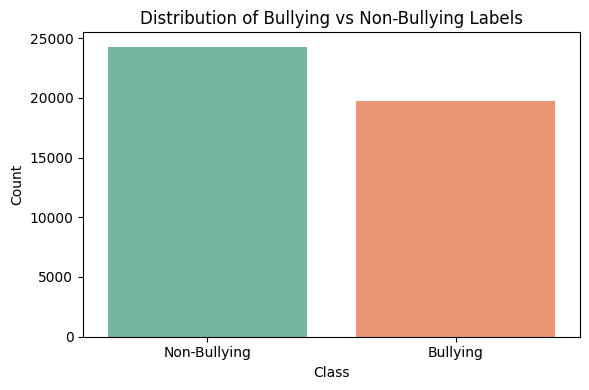

In [21]:
# Count plot for binary_label
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='binary_label', palette='Set2')

# Set axis labels and title
plt.xticks([0, 1], ['Non-Bullying', 'Bullying'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Bullying vs Non-Bullying Labels')

# Display the plot
plt.tight_layout()
plt.show()

**Encode to Multiclass**

In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = LabelEncoder()

df['multiclass_label'] = le.fit_transform(df['label'])

# Check the mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label to ID mapping:")
print(label_mapping)

print(df[['label', 'multiclass_label']].head(20))

Label to ID mapping:
{'not bully': np.int64(0), 'religious': np.int64(1), 'sexual': np.int64(2), 'threat': np.int64(3), 'troll': np.int64(4)}
        label  multiclass_label
0      sexual                 2
1   not bully                 0
2   not bully                 0
3   not bully                 0
4       troll                 4
5   not bully                 0
6       troll                 4
7   not bully                 0
8   religious                 1
9   not bully                 0
10  religious                 1
11  religious                 1
12  not bully                 0
13  not bully                 0
14  not bully                 0
15     sexual                 2
16     sexual                 2
17  not bully                 0
18      troll                 4
19     sexual                 2


**After Multi-Class Classification**

<ipython-input-23-fddda02c4bf9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='multiclass_label', palette='Set3')


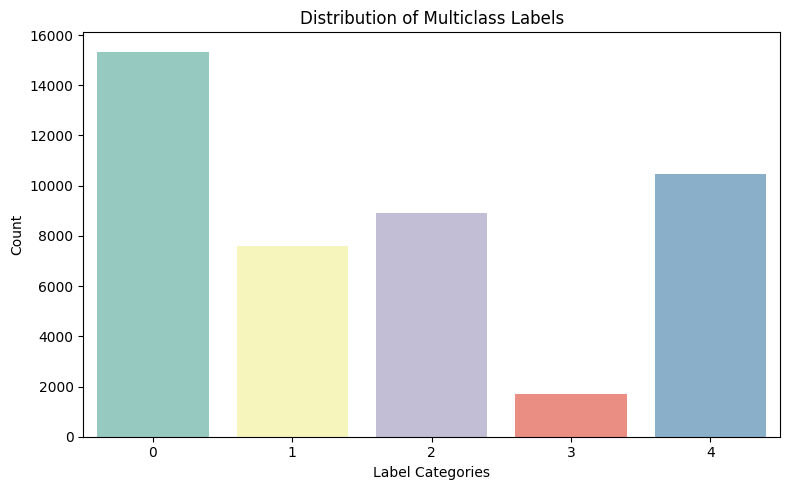

In [23]:
# Set figure size
plt.figure(figsize=(8, 5))

# Count plot for multiclass labels
sns.countplot(data=df, x='multiclass_label', palette='Set3')

# Add labels and title
plt.xlabel('Label Categories')
plt.ylabel('Count')
plt.title('Distribution of Multiclass Labels')

# Display plot
plt.tight_layout()
plt.show()



---



***Note: Although I encode the labels for both binary and multiclass classification, I focus only on the binary labels for feature extraction.***



---



**Data Imbalance Problem Solve**

In [24]:
!pip install imbalanced-learn

In [25]:
# Vectorize normalized text into TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(df['comment_unicode_normalized'])

y = df['binary_label']


# Split data
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE on training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: binary_label
0    19414
1    15786
Name: count, dtype: int64
After SMOTE: binary_label
0    19414
1    19414
Name: count, dtype: int64


In [26]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_vectorized, y)

print("After undersampling:", y_res.value_counts())

After undersampling: binary_label
0    19733
1    19733
Name: count, dtype: int64


**Visualization**

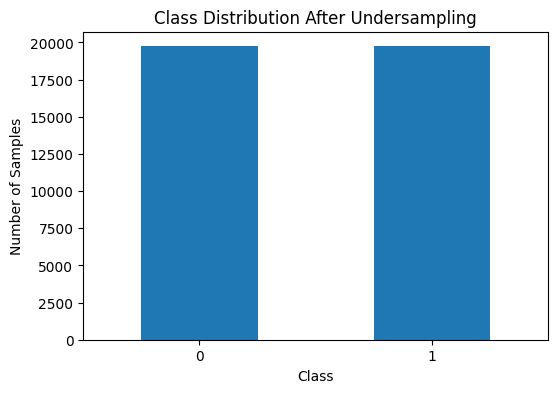

In [27]:
# Count the classes after undersampling
class_counts = y_res.value_counts()

# Plot
plt.figure(figsize=(6,4))
class_counts.plot(kind='bar')
plt.title('Class Distribution After Undersampling')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()

# **Feature Extraction**

**TF-IDF**

In [ ]:
X = df['comment_unicode_normalized']
y = df['binary_label']

# train-test split
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

vectorizer = TfidfVectorizer(max_features=5000)

# Fit on training data
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

In [ ]:
# Check shapes
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Training labels distribution:\n{y_train.value_counts()}")
print(f"Testing labels distribution:\n{y_test.value_counts()}")

Training set size: (35200, 5000)
Testing set size: (8801, 5000)
Training labels distribution:
binary_label
0    19414
1    15786
Name: count, dtype: int64
Testing labels distribution:
binary_label
0    4854
1    3947
Name: count, dtype: int64


**Logistic Regression**

In [ ]:
# Initialize LR model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Optional: Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy:  0.6925
Precision: 0.6835
Recall:    0.5855
F1-score:  0.6307

Confusion Matrix:
[[3784 1070]
 [1636 2311]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      4854
           1       0.68      0.59      0.63      3947

    accuracy                           0.69      8801
   macro avg       0.69      0.68      0.68      8801
weighted avg       0.69      0.69      0.69      8801



**Plot Confusion Matrix**

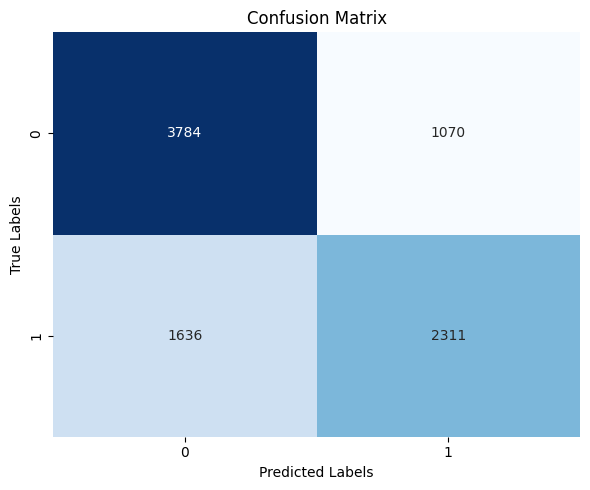

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

**Prediction Test:**

In [ ]:
# Number of random samples
num_samples = 20

# Randomly choose indices from the test set
random_indices = random.sample(range(X_test.shape[0]), num_samples)

# Map binary labels to human-readable form
label_map = {0: "Not Bully", 1: "Bully"}

print(f"{'Sample Text':<80} {'Actual':<10} {'Predicted':<10}")
print("-" * 110)

for idx in random_indices:
    original_text = X_test_text.iloc[idx]  # Original raw text (before vectorization)
    actual_label = y_test.iloc[idx]
    pred_label = model.predict(X_test[idx])[0]

    print(f"{original_text[:75]:<80} {label_map[actual_label]:<10} {label_map[pred_label]:<10}")

Sample Text                                                                      Actual     Predicted 
--------------------------------------------------------------------------------------------------------------
কুত্তা লাগবে                                                                     Bully      Not Bully 
আলম ভাই                                                                          Not Bully  Not Bully 
মেয়েটাকে কুত্তা চুদাতে                                                          Not Bully  Not Bully 
আরে পাগল                                                                         Bully      Bully     
হিরু আলম এগিয়ে চলআমরা আছি সাথে                                                  Not Bully  Not Bully 
সাফা কবিরের ক্যারিয়ারের মর্মান্তিক মৃত্যুতে সবাই শোকাহতসাফাকবির তুই গেছিলী      Bully      Bully     
মৃত্যর বুঝবি মাগী                                                                Not Bully  Not Bully 
পেইজ ডিসলাইক সবাই বুঝবে                                          

In [ ]:
def preprocess_input(text):
    text = normalize_bangla_text(text)
    text = remove_stopwords(text)
    text = unicode_normalize(text)
    return text

# User input for prediction
user_text = input("Enter a Bangla comment: ")

# Preprocess user input
clean_text = preprocess_input(user_text)


text_vector = vectorizer.transform([clean_text])
predicted_label = model.predict(text_vector)[0]
label_mapping = {0: "Not Bully", 1: "Bully"}
print(f"Predicted label: {label_mapping[predicted_label]}")

Enter a Bangla comment: আসুন জনি ভাই ছেড়ে দেই
Predicted label: Bully


**Save the Model**

In [ ]:
dump(model, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']

# **Convert to ONNX**

**Essentials:**

In [ ]:
!pip install skl2onnx onnxruntime

INFO: pip is looking at multiple versions of onnxconverter-common to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 3.5 MB/s eta 0:00:00


In [ ]:
pip uninstall onnx skl2onnx -y

Found existing installation: onnx 1.18.0
Uninstalling onnx-1.18.0:
  Successfully uninstalled onnx-1.18.0
Found existing installation: skl2onnx 1.18.0
Uninstalling skl2onnx-1.18.0:
  Successfully uninstalled skl2onnx-1.18.0


In [ ]:
pip install onnx==1.14.1 skl2onnx==1.18.0

  Using cached skl2onnx-1.18.0-py2.py3-none-any.whl.metadata (3.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 51.3 MB/s eta 0:00:00
Using cached skl2onnx-1.18.0-py2.py3-none-any.whl (300 kB)


In [ ]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import StringTensorType
import onnxruntime as ort
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', model)
])

# Define initial type for input: a batch of strings
initial_type = [('input', StringTensorType([None, 1]))]

# Convert the pipeline to ONNX
onnx_model = convert_sklearn(pipeline, initial_types=initial_type)

**Save the Model**

In [ ]:
# Save to file
with open("bangla_logistic_regression.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

print("Model successfully converted to ONNX and saved as bangla_logistic_regression.onnx")

Model successfully converted to ONNX and saved as bangla_logistic_regression.onnx


# **FastAPI**

**Essentials**

In [ ]:
pip install fastapi uvicorn onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.0 MB/s eta 0:00:00


In [ ]:
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import onnxruntime as ort
import unicodedata

In [ ]:
# Load Bangla stopwords
stopwords_df = pd.read_excel('Stopwords.xlsx')
stopwords_list = stopwords_df.iloc[:, 0].astype(str).tolist()


def preprocess_input(text):
    text = normalize_bangla_text(text)
    text = remove_stopwords(text)
    text = unicode_normalize(text)
    return text


# Define input data model for POST request
class Comment(BaseModel):
    text: str

app = FastAPI(title="Bangla Comment Sentiment Prediction")

# Load ONNX model session globally
onnx_session = ort.InferenceSession("bangla_logistic_regression.onnx")

def unicode_normalize(text):
    return unicodedata.normalize('NFC', text)

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords_list]
    return ' '.join(filtered_words)

def normalize_bangla_text(text):
    # Convert to string in case of NaN
    text = str(text)

    # Remove web links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove digits
    text = re.sub(r'\d+', '', text)

    # Remove punctuation and symbols
    text = re.sub(r'[^\u0980-\u09FF\s]', '', text)

    # Remove English letters
    text = re.sub(r'[a-zA-Z]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text


# Helper function: preprocess text
def preprocess_text(text):
    processed_text = preprocess_input(text)
    return processed_text

# Endpoint to accept comment and return predicted label
@app.post("/predict")
async def predict_sentiment(comment: Comment):
    try:
        # Preprocess input
        processed_text = preprocess_text(comment.text)

        # Prepare input for ONNX model
        input_name = onnx_session.get_inputs()[0].name
        inputs = {input_name: [[processed_text]]}  # shape (1,1)

        # Run inference
        pred_onx = onnx_session.run(None, inputs)
        pred_label = int(pred_onx[0][0])

        # Map label id to text
        label_map = {0: "Not Bully", 1: "Bully"}

        return {"predicted_label": label_map.get(pred_label, "Unknown")}

    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))



---



***Below, I have also attached a screenshot of my Postman Backend Tester.***



---



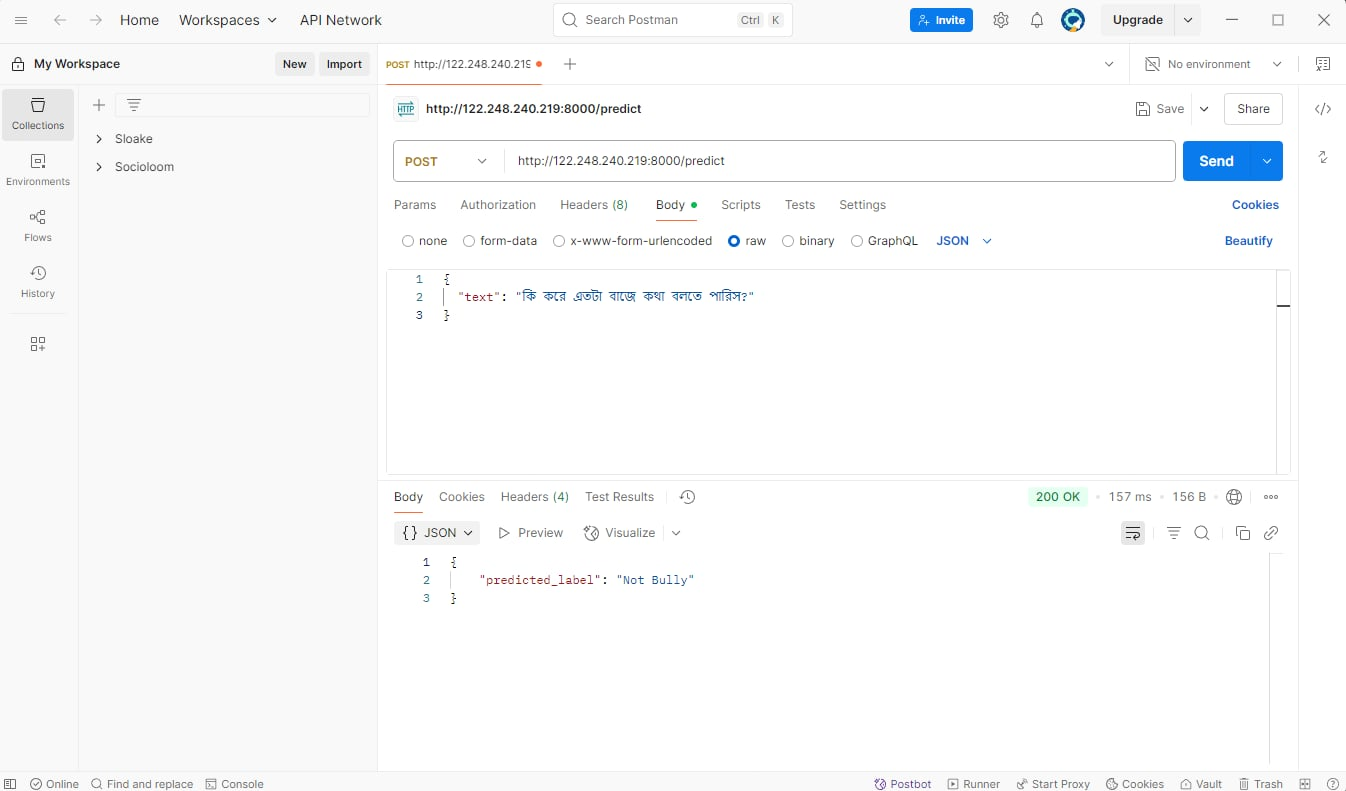

**How to Run the API:**

**Code organization:**
1. I separated all necessary preprocessing functions such as: text normalization, stopword removal into a dedicated Python file.
2. This file is imported into the main FastAPI app script.
3. The ONNX model file and stopwords dataset are placed in the same directory on the EC2 instance.

**Virtual Environment Setup:**
1. On the EC2 instance, I created a Python virtual environment (venv) to isolate dependencies.
2. This avoids version conflicts because different projects often require different package versions.
3. After creating the virtual environment, I activated it.
4. Inside the activated environment, I installed all required Python packages such as: fastapi, uvicorn, onnxruntime, pandas, openpyxl, etc.

**Running the FastAPI app:**
1. With the virtual environment activated, I ran the FastAPI server using Uvicorn.
2. I specified the host as 0.0.0.0 to allow external access and the port as 8000.
3. The server started successfully and was listening on port 8000.

**Testing the API with Postman:**
1. I used Postman to test the API.
2. In Postman, I set the method to POST and the URL to http://122.248.240.219:8000/predict.
3. In the request body, I selected raw and set the format to JSON.
4. I wrote the JSON payload with a "text" field containing the Bangla comment to analyze.
5. After sending the request, I received the predicted label in the JSON response.


**Example POST Request:**

1. In POSTMAN, use the http://122.248.240.219:8000/predict
2. Content-Type: application/json

3. {
  "text": "তুমি খুব খারাপ একজন মানুষ"
}

4. {
  "predicted_label": "Bully"
}